In [66]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from textblob import TextBlob
import seaborn as sns

In [3]:
fake_reviews = pd.read_csv("./../datasets/enh_freviews/enh_freviews.csv.zip", index_col=0)
real_reviews = pd.read_csv("./../datasets/enh_reviews/enh_reviews.csv.zip", index_col=0)


,rating,totalPhotos,is_fake,business.alias,comment.text,comment.language,user.reviewCount,user.friendCount,user.country.code,has_img
0,4,0,False,the-lizard-lounge-paris,It was a 2 man show. The bartender and cook b...,en,101,48,USA,True
1,4,0,False,the-lizard-lounge-paris,"during the afternoon, around happy hour, this ...",en,391,81,GBR,True
2,4,0,False,the-lizard-lounge-paris,"Very cool bar, chilled in the afternoon and pa...",en,34,1,FRA,True
3,5,0,False,the-lizard-lounge-paris,Nice place to chill if you needed a little bre...,en,184,112,USA,True
4,4,0,False,the-lizard-lounge-paris,"Just like other yelpers say, if u need to find...",en,73,16,USA,True
...,...,...,...,...,...,...,...,...,...,...
226138,5,1,False,banoi-paris,"Très bon, je me suis régalée ! Les rouleaux de...",fr,9,0,USA,True
226139,5,2,False,banoi-paris,Petite adresse viet testée juste avant un conc...,fr,192,48,FRA,True
226140,5,3,False,banoi-paris,Découvert il y a quelques semaines via lémissi...,fr,79,3,FRA,True
226141,5,0,False,banoi-paris,This is a little hole in the wall restaurant o...,en,11,0,USA,False


In [4]:
fake_reviews_fr = fake_reviews.loc[fake_reviews["comment.language"] == "fr"]
fake_reviews_en = fake_reviews.loc[fake_reviews["comment.language"] == "en"]
real_reviews_fr = real_reviews.loc[real_reviews["comment.language"] == "fr"]
real_reviews_en = real_reviews.loc[real_reviews["comment.language"] == "en"]

### General aspects of reviews and reviewer

#### Length of reviews

In [5]:
# Average number of characters for en and fr reviews
avg_char_fake_fr = fake_reviews_fr["comment.text"].str.len().mean()
avg_char_fake_en = fake_reviews_en["comment.text"].str.len().mean()

avg_char_real_fr = real_reviews_fr["comment.text"].str.len().mean()
avg_char_real_en = real_reviews_en["comment.text"].str.len().mean()

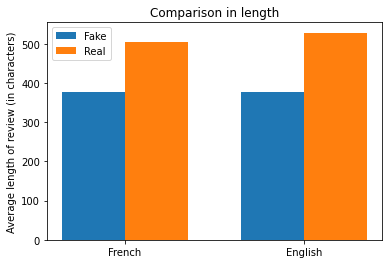

In [23]:
len_reviews_fr = [avg_char_fake_fr, avg_char_fake_en]
len_reviews_en = [avg_char_real_fr, avg_char_real_en]
labels_char = ("French", "English")

x = np.arange(2)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, avg_char_fake_fr, width, label='Fake')
rects2 = ax.bar(x + width/2, len_reviews_en, width, label='Real')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average length of review (in characters)')
ax.set_title('Comparison in length')
ax.set_xticks(x)
ax.set_xticklabels(labels_char)
ax.legend()

plt.show()

#### Number of friends

In [45]:
avg_friends_fake = fake_reviews["user.friendCount"].mean()
avg_friends_real = real_reviews["user.friendCount"].mean()

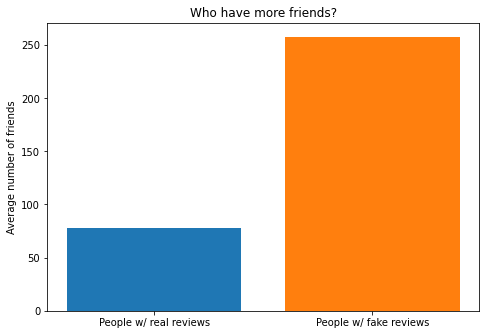

In [46]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels_friends = ['People w/ real reviews', 'People w/ fake reviews']
friends_average = [avg_friends_real,avg_friends_fake]
ax.bar(labels_friends,friends_average,color=['#1F77B4', '#FF7F0E'])
ax.set_title("Who have more friends?")
ax.set_ylabel("Average number of friends")
plt.show()

#### Do fakers review more often?

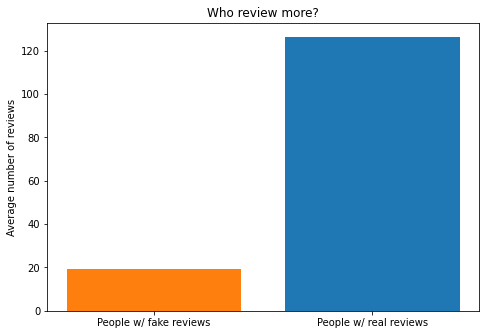

In [48]:
avg_rcount = real_reviews["user.reviewCount"].mean()
avg_frcount = fake_reviews["user.reviewCount"].mean()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels_review_count = ['People w/ fake reviews', 'People w/ real reviews']
review_count_average = [avg_frcount, avg_rcount]
ax.bar(labels_review_count,review_count_average,color=['#FF7F0E', '#1F77B4'])
ax.set_title("Who review more?")
ax.set_ylabel("Average number of reviews")
plt.show()

#### Fake reviews are more extreme?

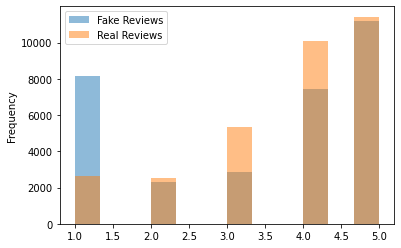

In [50]:
# Plotting distribution of fake reviews as a histogram with respect to rating
df_hist = pd.DataFrame()

df_hist["Fake Reviews"] = fake_reviews["rating"]
df_hist["Real Reviews"] = real_reviews["rating"]

ax = df_hist.plot.hist(bins=12, alpha=0.5)

It can be noticed that fake reviews have peaks on extremely low and extremely high ratings. This corroborates to the idea that fake reviews are used to lower the rating of competitors and also to increase the rating of the benefited restaurant.

### NLP model to differentiate fake from real reviews

In [64]:
fake_reviews_en["comment.polarity"] = fake_reviews_en["comment.text"].apply(lambda x: TextBlob(x).sentiment.polarity)
real_reviews_en["comment.polarity"] = real_reviews_en["comment.text"].apply(lambda x: TextBlob(x).sentiment.polarity)

fake_reviews_en["comment.polarity_abs"] = fake_reviews_en["comment.polarity"].abs()
real_reviews_en["comment.polarity_abs"] = real_reviews_en["comment.polarity"].abs()

<ipython-input-64-31cb3693c3e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_reviews_en["comment.polarity"] = fake_reviews_en["comment.text"].apply(lambda x: TextBlob(x).sentiment.polarity)
<ipython-input-64-31cb3693c3e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_reviews_en["comment.polarity"] = real_reviews_en["comment.text"].apply(lambda x: TextBlob(x).sentiment.polarity)
<ipython-input-64-31cb3693c3e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

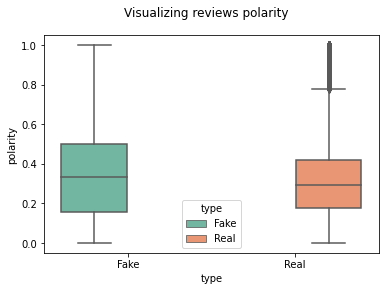

In [90]:
df_box0 = pd.DataFrame()
df_box1 = pd.DataFrame()

df_box0["polarity"] = fake_reviews_en["comment.polarity_abs"]
df_box0["type"] = "Fake"
df_box1["polarity"] = real_reviews_en["comment.polarity_abs"]
df_box1["type"] = "Real"

df_box = pd.concat([df_box0, df_box1], ignore_index=True)

f, ax = plt.subplots()

bp = sns.boxplot(x='type', y="polarity", 
                 hue='type', data=df_box, palette="Set2", ax=ax)

t = f.suptitle('Visualizing reviews polarity')